In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cupy as cp

def visualize_array(array, title):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the array as an image
    cax = ax.imshow(array, cmap="viridis", aspect="auto")

    # Add a colorbar
    fig.colorbar(cax, label="Value Intensity")

    # Show grid lines
    ax.set_xticks(np.arange(array.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(array.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)

    # Display values on the grid
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            ax.text(j, i, f"{array[i, j]:.1f}", ha="center", va="center", color="white" if array[i, j] > np.max(array)/2 else "black")

    ax.set_title(title)
    ax.set_xlabel("Columns")
    ax.set_ylabel("Rows")

    plt.show()

In [2]:
test_array = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 9, 9, 9, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 9, 9, 9, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 9, 9, 9, 4.5, 4.5, 0, 0, 0],
    [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 9, 9, 9, 4.5, 4.5, 0, 0, 0],
    [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 9, 9, 9, 4.5, 4.5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 4.5, 4.5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 0, 0, 0, 0, 0, 0, 0, 0]
])


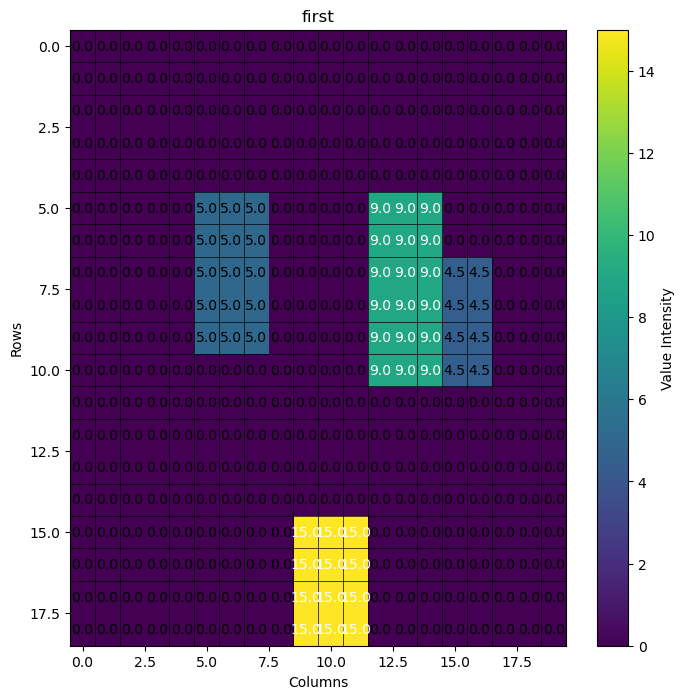

In [3]:
visualize_array(test_array, "first")

In [4]:
def shadowingfunctionglobalradiation(a, azimuth, altitude, scale, forsvf):
    #%This m.file calculates shadows on a DEM
    #% conversion
    degrees = np.pi/180.
    # if azimuth == 0.0:
        # azimuth = 0.000000000001
    azimuth = np.dot(azimuth, degrees)
    altitude = np.dot(altitude, degrees)
    #% measure the size of the image
    sizex = a.shape[0]
    sizey = a.shape[1]
    if forsvf == 0:
        barstep = np.max([sizex, sizey])
        total = 100. / barstep #dlg.progressBar.setRange(0, barstep)
    #% initialise parameters
    f = a
    dx = 0.
    dy = 0.
    dz = 0.
    temp = np.zeros((sizex, sizey))
    index = 1.
    #% other loop parameters
    amaxvalue = a.max()
    pibyfour = np.pi/4.
    threetimespibyfour = 3.*pibyfour
    fivetimespibyfour = 5.*pibyfour
    seventimespibyfour = 7.*pibyfour
    sinazimuth = np.sin(azimuth)
    cosazimuth = np.cos(azimuth)
    tanazimuth = np.tan(azimuth)
    signsinazimuth = np.sign(sinazimuth)
    signcosazimuth = np.sign(cosazimuth)
    dssin = np.abs((1./sinazimuth))
    dscos = np.abs((1./cosazimuth))
    tanaltitudebyscale = np.tan(altitude) / scale
    #% main loop
    while (amaxvalue >= dz and np.abs(dx) < sizex and np.abs(dy) < sizey):
        if forsvf == 0:
            print(int(index * total))
            # dlg.progressBar.setValue(index)
    #while np.logical_and(np.logical_and(amaxvalue >= dz, np.abs(dx) <= sizex), np.abs(dy) <= sizey):(np.logical_and(amaxvalue >= dz, np.abs(dx) <= sizex), np.abs(dy) <= sizey):
        #if np.logical_or(np.logical_and(pibyfour <= azimuth, azimuth < threetimespibyfour), np.logical_and(fivetimespibyfour <= azimuth, azimuth < seventimespibyfour)):
        if (pibyfour <= azimuth and azimuth < threetimespibyfour or fivetimespibyfour <= azimuth and azimuth < seventimespibyfour):
            dy = signsinazimuth * index
            dx = -1. * signcosazimuth * np.abs(np.round(index / tanazimuth))
            ds = dssin
        else:
            dy = signsinazimuth * np.abs(np.round(index * tanazimuth))
            dx = -1. * signcosazimuth * index
            ds = dscos

        #% note: dx and dy represent absolute values while ds is an incremental value
        dz = ds *index * tanaltitudebyscale
        temp[0:sizex, 0:sizey] = 0.
        absdx = np.abs(dx)
        absdy = np.abs(dy)
        xc1 = (dx+absdx)/2.+1.
        xc2 = sizex+(dx-absdx)/2.
        yc1 = (dy+absdy)/2.+1.
        yc2 = sizey+(dy-absdy)/2.
        xp1 = -((dx-absdx)/2.)+1.
        xp2 = sizex-(dx+absdx)/2.
        yp1 = -((dy-absdy)/2.)+1.
        yp2 = sizey-(dy+absdy)/2.
        temp[int(xp1)-1:int(xp2), int(yp1)-1:int(yp2)] = a[int(xc1)-1:int(xc2), int(yc1)-1:int(yc2)]-dz
        # f = np.maximum(f, temp)  # bad performance in python3. Replaced with fmax
        f = np.fmax(f, temp)
        index += 1.
        # visualize_array(temp, f" Temp index {index}")
        # visualize_array(f, f" F index {index}")


    f = f-a
    visualize_array(f, f" F end")
    f = np.logical_not(f)
    sh = np.double(f)
    visualize_array(sh, "shadow")

    return sh

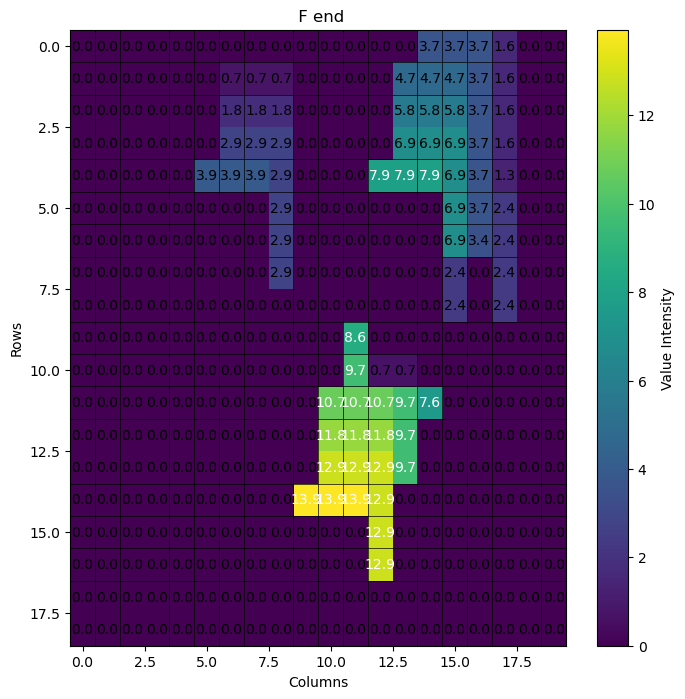

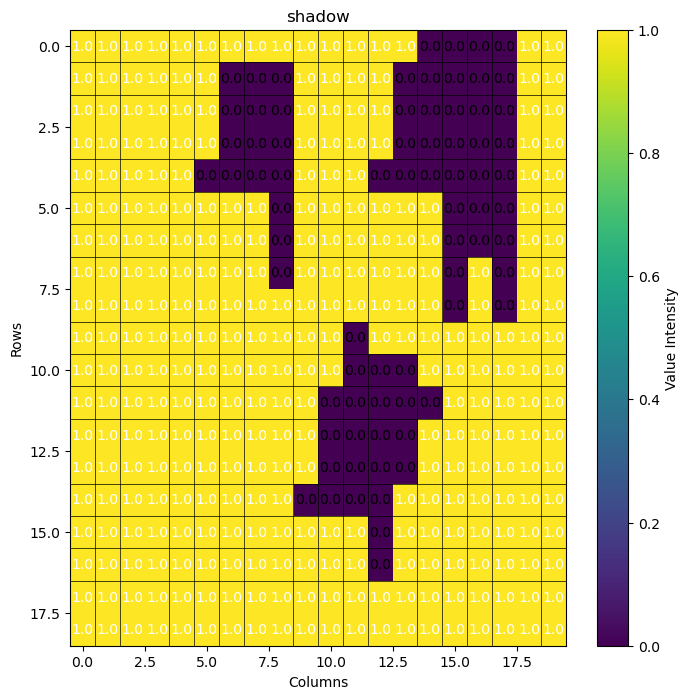

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.

In [5]:
azi = 200
alt = 45
scal = 1
shadowingfunctionglobalradiation(test_array, azi, alt, scal, forsvf=1)

In [23]:
def write_output(dataset, crs, output, transform, name, change_nodata=False):
    """
    Write grid to .tiff file.
    ----
    Input:
    - dataset: Can be either a rasterio dataset (for rasters) or laspy dataset (for point clouds)
    - output (Array): the output grid, a numpy grid.
    - name (String): the name of the output file.
    - transform:
      a user defined rasterio Affine object, used for the transforming the pixel coordinates
      to spatial coordinates.
    - change_nodata (Boolean): true: use a no data value of -9999, false: use the datasets no data value
    """
    output_file = name

    output = np.squeeze(output)
    # Set the nodata value: use -9999 if nodata_value is True or dataset does not have nodata.
    if change_nodata:
        nodata_value = -9999
    else:
        try:
            # TO DO: CHANGE THIS TO JUST INPUTTING A NODATA VALUE, NO NEED FOR THE WHOLE DATASET IN THIS FUNCTION
            nodata_value = dataset.nodata
            if nodata_value is None:
                raise AttributeError("No no data value found in dataset.")
        except AttributeError as e:
            print(f"Warning: {e}. Defaulting to -9999.")
            nodata_value = -9999

    # output the dataset
    with rasterio.open(output_file, 'w',
                       driver='GTiff',
                       height=output.shape[0],  # Assuming output is (rows, cols)
                       width=output.shape[1],
                       count=1,
                       dtype=np.float32,
                       crs=crs,
                       nodata=nodata_value,
                       transform=transform) as dst:
        dst.write(output, 1)
    print("File written to '%s'" % output_file)

In [10]:
def shadowingfunction_20(a, vegdem, vegdem2, azimuth, altitude, scale, amaxvalue, trunkcheck, bush, forsvf, savepath, dsm):

    # This function casts shadows on buildings and vegetation units.
    # New capability to deal with pergolas 20210827

    # conversion
    degrees = np.pi/180.
    azimuth = azimuth * degrees
    altitude = altitude * degrees

    # measure the size of grid
    sizex = a.shape[0]
    sizey = a.shape[1]

    # progressbar for svf plugin
    if forsvf == 0:
        barstep = np.max([sizex, sizey])
        total = 100. / barstep
        # dlg.progressBar.setRange(0, barstep)
        # dlg.progressBar.setValue(0)

    # initialise parameters
    dx = 0.
    dy = 0.
    dz = 0.
    temp = np.zeros((sizex, sizey))
    tempvegdem = np.zeros((sizex, sizey))
    tempvegdem2 = np.zeros((sizex, sizey))
    templastfabovea = np.zeros((sizex, sizey))
    templastgabovea = np.zeros((sizex, sizey))
    bushplant = bush > 1.
    sh = np.zeros((sizex, sizey)) #shadows from buildings
    vbshvegsh = np.zeros((sizex, sizey)) #vegetation blocking buildings

    vegsh = np.add(np.zeros((sizex, sizey)), bushplant, dtype=float) #vegetation shadow
    f = a

    pibyfour = np.pi / 4.
    threetimespibyfour = 3. * pibyfour
    fivetimespibyfour = 5.* pibyfour
    seventimespibyfour = 7. * pibyfour
    sinazimuth = np.sin(azimuth)
    cosazimuth = np.cos(azimuth)
    tanazimuth = np.tan(azimuth)
    signsinazimuth = np.sign(sinazimuth)
    signcosazimuth = np.sign(cosazimuth)
    dssin = np.abs((1./sinazimuth))
    dscos = np.abs((1./cosazimuth))
    tanaltitudebyscale = np.tan(altitude) / scale
    # index = 1
    index = 0

    # new case with pergola (thin vertical layer of vegetation), August 2021
    dzprev = 0

    # main loop
    while (amaxvalue >= dz) and (np.abs(dx) < sizex) and (np.abs(dy) < sizey):
        if forsvf == 0:
            print(int(index * total)) #dlg.progressBar.setValue(index)
        if ((pibyfour <= azimuth) and (azimuth < threetimespibyfour) or (fivetimespibyfour <= azimuth) and (azimuth < seventimespibyfour)):
            dy = signsinazimuth * index
            dx = -1. * signcosazimuth * np.abs(np.round(index / tanazimuth))
            ds = dssin
        else:
            dy = signsinazimuth * np.abs(np.round(index * tanazimuth))
            dx = -1. * signcosazimuth * index
            ds = dscos
        # note: dx and dy represent absolute values while ds is an incremental value
        dz = (ds * index) * tanaltitudebyscale
        tempvegdem[0:sizex, 0:sizey] = 0.
        tempvegdem2[0:sizex, 0:sizey] = 0.
        temp[0:sizex, 0:sizey] = 0.
        templastfabovea[0:sizex, 0:sizey] = 0.
        templastgabovea[0:sizex, 0:sizey] = 0.
        absdx = np.abs(dx)
        absdy = np.abs(dy)
        xc1 = int((dx+absdx)/2.)
        xc2 = int(sizex+(dx-absdx)/2.)
        yc1 = int((dy+absdy)/2.)
        yc2 = int(sizey+(dy-absdy)/2.)
        xp1 = int(-((dx-absdx)/2.))
        xp2 = int(sizex-(dx+absdx)/2.)
        yp1 = int(-((dy-absdy)/2.))
        yp2 = int(sizey-(dy+absdy)/2.)
        isTrunk = trunkcheck >= dz
        # print(dy, dx, dz)
        # print(f' xc1: {xc1}; xc2: {xc2}, yc1:  {yc1}, yc2: {yc2}, xp1: {xp1}, xp2: {xp2}, yp1: {yp1}, yp2: {yp2} ')
        tempvegdem[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dz
        temp[xp1:xp2, yp1:yp2] = a[xc1:xc2, yc1:yc2]-dz

        f = np.fmax(f, temp) #Moving building shadow
        sh[(f > a)] = 1.
        sh[(f <= a)] = 0.
        fabovea = tempvegdem > a #vegdem above DEM

        templastfabovea[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dzprev
        lastfabovea = templastfabovea > a

        if isTrunk:
            tempvegdem2[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2] - dz
            gabovea = tempvegdem2 > a #vegdem2 above DEM

            #new pergola condition
            templastgabovea[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2]- dzprev
            lastgabovea = templastgabovea > a

            vegsh2 = np.add(np.add(np.add(fabovea, gabovea, dtype=float), lastfabovea, dtype=float), lastgabovea,
                            dtype=float)

            # Apply the zeroing condition
            vegsh2[vegsh2 == 4] = 0.
            vegsh2[vegsh2 > 0] = 1.
        else:
            vegsh2 = (fabovea | lastfabovea).astype(float)
        vegsh = np.fmax(vegsh, vegsh2)

        # TO DO: THINK MORE ABOUT THIS LOGIC
        # vegsh2 = np.zeros_like(vegdem, dtype=float)
        # vegsh2[(fabovea) & (~gabovea)] = 1

        vegsh[(vegsh * sh > 0.)] = 0.
        vbshvegsh = vegsh + vbshvegsh # removing shadows 'behind' buildings

        dzprev = dz
        index += 1.

    sh = 1.-sh
    vbshvegsh[(vbshvegsh > 0.)] = 1.
    vbshvegsh = vbshvegsh-vegsh
    vegsh = 1.-vegsh
    vbshvegsh = 1.-vbshvegsh

    shadowresult = {'sh': sh, 'vegsh': vegsh, 'vbshvegsh': vbshvegsh}

    name = savepath + "vgog_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, vegsh, dsm.transform, name)

    name = savepath + "bdog_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, sh, dsm.transform, name)

    name = savepath + "vbog_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, vbshvegsh, dsm.transform, name)

    return shadowresult

In [18]:
def shadowingfunction_20_cupy(a, vegdem, vegdem2, azimuth, altitude, scale, amaxvalue, trunkcheck, bush, forsvf, savepath, dsm):
    # Conversion
    degrees = cp.pi / 180.0
    azimuth = azimuth * degrees
    altitude = altitude * degrees

    # Grid size
    sizex, sizey = a.shape

    # Initialize parameters
    dx = dy = dz = 0.0
    temp = cp.zeros((sizex, sizey), dtype=cp.float32)
    tempvegdem = cp.zeros((sizex, sizey), dtype=cp.float32)
    tempvegdem2 = cp.zeros((sizex, sizey), dtype=cp.float32)
    templastfabovea = cp.zeros((sizex, sizey))
    templastgabovea = cp.zeros((sizex, sizey))
    bushplant = bush > 1.0
    sh = cp.zeros((sizex, sizey), dtype=cp.float32)
    vbshvegsh = cp.zeros((sizex, sizey), dtype=cp.float32)
    vegsh = cp.array(bushplant, dtype=cp.float32)

    f = cp.array(a, dtype=cp.float32)

    # Precompute trigonometric values
    pibyfour = cp.pi / 4.0
    threetimespibyfour = 3.0 * pibyfour
    fivetimespibyfour = 5.0 * pibyfour
    seventimespibyfour = 7.0 * pibyfour
    sinazimuth = cp.sin(azimuth)
    cosazimuth = cp.cos(azimuth)
    tanazimuth = cp.tan(azimuth)
    signsinazimuth = cp.sign(sinazimuth)
    signcosazimuth = cp.sign(cosazimuth)
    dssin = cp.abs(1.0 / sinazimuth)
    dscos = cp.abs(1.0 / cosazimuth)
    tanaltitudebyscale = cp.tan(altitude) / scale

    isVert = ((pibyfour <= azimuth) & (azimuth < threetimespibyfour)) | \
             ((fivetimespibyfour <= azimuth) & (azimuth < seventimespibyfour))
    if isVert:
        ds = dssin
    else:
        ds = dscos

    # preva = a + ds

    index = 0
    dzprev = 0

    while (amaxvalue >= dz) and (cp.abs(dx) < sizex) and (cp.abs(dy) < sizey):
        if isVert:
            dy = signsinazimuth * index
            dx = -signcosazimuth * cp.abs(cp.round(index / tanazimuth))
        else:
            dy = signsinazimuth * cp.abs(cp.round(index * tanazimuth))
            dx = -signcosazimuth * index

        dz = (ds * index) * tanaltitudebyscale

        tempvegdem.fill(0)
        tempvegdem2.fill(0)
        temp.fill(0)

        absdx = cp.abs(dx)
        absdy = cp.abs(dy)
        xc1 = int((dx + absdx) / 2.0)
        xc2 = int(sizex + (dx - absdx) / 2.0)
        yc1 = int((dy + absdy) / 2.0)
        yc2 = int(sizey + (dy - absdy) / 2.0)
        xp1 = int(-((dx - absdx) / 2.0))
        xp2 = int(sizex - (dx + absdx) / 2.0)
        yp1 = int(-((dy - absdy) / 2.0))
        yp2 = int(sizey - (dy + absdy) / 2.0)

        isTrunk = trunkcheck >= dz

        tempvegdem[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dz
        temp[xp1:xp2, yp1:yp2] = a[xc1:xc2, yc1:yc2] - dz

        f = cp.fmax(f, temp)
        sh = cp.where(f > a, 1.0, 0.0)

        fabovea = tempvegdem > a

        templastfabovea[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dzprev
        lastfabovea = templastfabovea > a

        if isTrunk:
            tempvegdem2[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2] - dz
            gabovea = tempvegdem2 > a

            templastgabovea[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2]- dzprev
            lastgabovea = templastgabovea > a

            vegsh2 = cp.add(fabovea, gabovea).astype(cp.float32)
            vegsh2 += lastfabovea + lastgabovea

            vegsh2[vegsh2 == 4] = 0.0
            vegsh2[vegsh2 > 0] = 1.0
        else:
            vegsh2 = (fabovea | lastfabovea).astype(cp.float32)

        vegsh = cp.fmax(vegsh, vegsh2)
        vegsh[vegsh * sh > 0.0] = 0.0
        vbshvegsh += vegsh

        dzprev = dz
        index += 1.

    sh = 1.0 - sh
    vbshvegsh[vbshvegsh > 0.0] = 1.0
    vbshvegsh -= vegsh
    vegsh = 1.0 - vegsh
    vbshvegsh = 1.0 - vbshvegsh

    name = savepath + "vgne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, vegsh.get(), dsm.transform, name)

    name = savepath + "bdne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, sh.get(), dsm.transform, name)

    name = savepath + "vbne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, vbshvegsh.get(), dsm.transform, name)


    shadowresult = {
        'sh': sh.get(),
        'vegsh': vegsh.get(),
        'vbshvegsh': vbshvegsh.get()
    }
    return shadowresult

In [4]:
def shadowingfunction_slice(a, vegdem, vegdem2, azimuth, altitude, scale, amaxvalue, trunkcheck, bush, forsvf, savepath, dsm):

    # This function casts shadows on buildings and vegetation units.
    # New capability to deal with pergolas 20210827

    # conversion
    degrees = np.pi/180.
    azimuth = azimuth * degrees
    altitude = altitude * degrees

    # measure the size of grid
    sizex = a.shape[0]
    sizey = a.shape[1]

    # progressbar for svf plugin
    if forsvf == 0:
        barstep = np.max([sizex, sizey])
        total = 100. / barstep
        # dlg.progressBar.setRange(0, barstep)
        # dlg.progressBar.setValue(0)

    # initialise parameters
    dx = 0.
    dy = 0.
    dz = 0.
    temp = np.zeros((sizex, sizey))
    tempvegdem = np.zeros((sizex, sizey))
    tempvegdem2 = np.zeros((sizex, sizey))
    templastfabovea = np.zeros((sizex, sizey))
    templastgabovea = np.zeros((sizex, sizey))
    bushplant = bush > 1.
    sh = np.zeros((sizex, sizey)) #shadows from buildings
    vbshvegsh = np.zeros((sizex, sizey)) #vegetation blocking buildings

    vegsh = np.add(np.zeros((sizex, sizey)), bushplant, dtype=float) #vegetation shadow
    f = a

    pibyfour = np.pi / 4.
    threetimespibyfour = 3. * pibyfour
    fivetimespibyfour = 5.* pibyfour
    seventimespibyfour = 7. * pibyfour
    sinazimuth = np.sin(azimuth)
    cosazimuth = np.cos(azimuth)
    tanazimuth = np.tan(azimuth)
    signsinazimuth = np.sign(sinazimuth)
    signcosazimuth = np.sign(cosazimuth)
    dssin = np.abs((1./sinazimuth))
    dscos = np.abs((1./cosazimuth))
    tanaltitudebyscale = np.tan(altitude) / scale

    # index = 1
    index = 0

    if ((pibyfour <= azimuth) and (azimuth < threetimespibyfour) or (fivetimespibyfour <= azimuth) and (azimuth < seventimespibyfour)):
        ds = dssin
    else:
        ds = dscos

    preva = a + ds

    # new case with pergola (thin vertical layer of vegetation), August 2021
    dzprev = 0

    # main loop
    while (amaxvalue >= dz) and (np.abs(dx) < sizex) and (np.abs(dy) < sizey):
        if forsvf == 0:
            print(int(index * total)) #dlg.progressBar.setValue(index)
        if ((pibyfour <= azimuth) and (azimuth < threetimespibyfour) or (fivetimespibyfour <= azimuth) and (azimuth < seventimespibyfour)):
            dy = signsinazimuth * index
            dx = -1. * signcosazimuth * np.abs(np.round(index / tanazimuth))
            ds = dssin
        else:
            dy = signsinazimuth * np.abs(np.round(index * tanazimuth))
            dx = -1. * signcosazimuth * index
            ds = dscos
        # note: dx and dy represent absolute values while ds is an incremental value
        dz = (ds * index) * tanaltitudebyscale
        tempvegdem[0:sizex, 0:sizey] = 0.
        tempvegdem2[0:sizex, 0:sizey] = 0.
        temp[0:sizex, 0:sizey] = 0.
        templastfabovea[0:sizex, 0:sizey] = 0.
        templastgabovea[0:sizex, 0:sizey] = 0.
        absdx = np.abs(dx)
        absdy = np.abs(dy)
        xc1 = int((dx+absdx)/2.)
        xc2 = int(sizex+(dx-absdx)/2.)
        yc1 = int((dy+absdy)/2.)
        yc2 = int(sizey+(dy-absdy)/2.)
        xp1 = int(-((dx-absdx)/2.))
        xp2 = int(sizex-(dx+absdx)/2.)
        yp1 = int(-((dy-absdy)/2.))
        yp2 = int(sizey-(dy+absdy)/2.)
        isTrunk = trunkcheck >= dz
        # print(dy, dx, dz)
        # print(f' xc1: {xc1}; xc2: {xc2}, yc1:  {yc1}, yc2: {yc2}, xp1: {xp1}, xp2: {xp2}, yp1: {yp1}, yp2: {yp2} ')
        tempvegdem[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dz
        temp[xp1:xp2, yp1:yp2] = a[xc1:xc2, yc1:yc2]-dz

        f = np.fmax(f, temp) #Moving building shadow
        sh[(f > a)] = 1.
        sh[(f <= a)] = 0.
        fabovea = tempvegdem > a #vegdem above DEM

        lastfabovea = tempvegdem > preva

        if isTrunk:
            tempvegdem2[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2] - dz
            gabovea = tempvegdem2 > a #vegdem2 above DEM

            #new pergola condition
            lastgabovea = tempvegdem2 > preva

            vegsh2 = np.add(np.add(np.add(fabovea, gabovea, dtype=float), lastfabovea, dtype=float), lastgabovea,
                            dtype=float)

            # Apply the zeroing condition
            vegsh2[vegsh2 == 4] = 0.
            vegsh2[vegsh2 > 0] = 1.
        else:
            vegsh2 = (fabovea | lastfabovea).astype(float)
        vegsh = np.fmax(vegsh, vegsh2)

        # TO DO: THINK MORE ABOUT THIS LOGIC
        # vegsh2 = np.zeros_like(vegdem, dtype=float)
        # vegsh2[(fabovea) & (~gabovea)] = 1

        vegsh[(vegsh * sh > 0.)] = 0.
        vbshvegsh = vegsh + vbshvegsh # removing shadows 'behind' buildings

        index += 1.

    sh = 1.-sh
    vbshvegsh[(vbshvegsh > 0.)] = 1.
    vbshvegsh = vbshvegsh-vegsh
    vegsh = 1.-vegsh
    vbshvegsh = 1.-vbshvegsh

    shadowresult = {'sh': sh, 'vegsh': vegsh, 'vbshvegsh': vbshvegsh}

    name = savepath + "vgne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, vegsh, dsm.transform, name)

    name = savepath + "bdne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, sh, dsm.transform, name)

    name = savepath + "vbne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, vbshvegsh, dsm.transform, name)

    return shadowresult

In [37]:
def shadowingfunction_3d(a, vegdem, vegdem2, azimuth, altitude, scale, amaxvalue, trunkcheck, bush, forsvf, savepath):

    # This function casts shadows on buildings and vegetation units.
    # New capability to deal with pergolas 20210827

    # conversion
    degrees = np.pi/180.
    azimuth = azimuth * degrees
    altitude = altitude * degrees

    # measure the size of grid
    sizex = a.shape[1]
    sizey = a.shape[2]

    # progressbar for svf plugin
    if forsvf == 0:
        barstep = np.max([sizex, sizey])
        total = 100. / barstep
        # dlg.progressBar.setRange(0, barstep)
        # dlg.progressBar.setValue(0)

    # initialise parameters
    dx = 0.
    dy = 0.
    dz = 0.
    temp = np.zeros((sizex, sizey))
    tempvegdem = np.zeros((sizex, sizey))
    tempvegdem2 = np.zeros((sizex, sizey))
    templastfabovea = np.zeros((sizex, sizey))
    templastgabovea = np.zeros((sizex, sizey))
    temp_first = np.zeros((sizex, sizey))
    temp_second = np.zeros((sizex, sizey))
    bushplant = bush > 1.
    sh = np.zeros((sizex, sizey)) #shadows from buildings
    vbshvegsh = np.zeros((sizex, sizey)) #vegetation blocking buildings

    vegsh = np.add(np.zeros((sizex, sizey)), bushplant, dtype=float) #vegetation shadow
    dsm_ground = a[0]
    dsm_firstgap = a[1]
    dsm_toplayer = a[2]

    pibyfour = np.pi / 4.
    threetimespibyfour = 3. * pibyfour
    fivetimespibyfour = 5.* pibyfour
    seventimespibyfour = 7. * pibyfour
    sinazimuth = np.sin(azimuth)
    cosazimuth = np.cos(azimuth)
    tanazimuth = np.tan(azimuth)
    signsinazimuth = np.sign(sinazimuth)
    signcosazimuth = np.sign(cosazimuth)
    dssin = np.abs((1./sinazimuth))
    dscos = np.abs((1./cosazimuth))
    tanaltitudebyscale = np.tan(altitude) / scale
    # index = 1
    index = 0

    # new case with pergola (thin vertical layer of vegetation), August 2021
    dzprev = 0

    isVert = ((pibyfour <= azimuth) & (azimuth < threetimespibyfour)) or ((fivetimespibyfour <= azimuth) & (azimuth < seventimespibyfour))
    if isVert:
        ds = dssin
    else:
        ds = dscos

    # main loop
    while (amaxvalue >= dz) and (np.abs(dx) < sizex) and (np.abs(dy) < sizey):
        if forsvf == 0:
            print(int(index * total)) #dlg.progressBar.setValue(index)
        if isVert:
            dy = signsinazimuth * index
            dx = -1. * signcosazimuth * np.abs(np.round(index / tanazimuth))
        else:
            dy = signsinazimuth * np.abs(np.round(index * tanazimuth))
            dx = -1. * signcosazimuth * index
        # note: dx and dy represent absolute values while ds is an incremental value
        dz = (ds * index) * tanaltitudebyscale

        tempvegdem[0:sizex, 0:sizey] = 0.
        tempvegdem2[0:sizex, 0:sizey] = 0.
        temp[0:sizex, 0:sizey] = 0.
        temp_first[0:sizex, 0:sizey] = 0.
        temp_second[0:sizex, 0:sizey] = 0.

        templastfabovea[0:sizex, 0:sizey] = 0.
        templastgabovea[0:sizex, 0:sizey] = 0.
        absdx = np.abs(dx)
        absdy = np.abs(dy)
        xc1 = int((dx+absdx)/2.)
        xc2 = int(sizex+(dx-absdx)/2.)
        yc1 = int((dy+absdy)/2.)
        yc2 = int(sizey+(dy-absdy)/2.)
        xp1 = int(-((dx-absdx)/2.))
        xp2 = int(sizex-(dx+absdx)/2.)
        yp1 = int(-((dy-absdy)/2.))
        yp2 = int(sizey-(dy+absdy)/2.)
        isTrunk = trunkcheck >= dz
        # print(dy, dx, dz)
        # print(f' xc1: {xc1}; xc2: {xc2}, yc1:  {yc1}, yc2: {yc2}, xp1: {xp1}, xp2: {xp2}, yp1: {yp1}, yp2: {yp2} ')
        tempvegdem[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dz
        temp[xp1:xp2, yp1:yp2] = a[0][xc1:xc2, yc1:yc2]-dz
        temp_first[xp1:xp2, yp1:yp2] = a[1][xc1:xc2, yc1:yc2]-dz
        temp_second[xp1:xp2, yp1:yp2] = a[2][xc1:xc2, yc1:yc2]-dz

        # Building part
        dsm_ground = np.fmax(dsm_ground, temp) #Moving building shadow
        dsm_firstgap = np.fmax(dsm_firstgap, temp)
        dsm_toplayer = np.fmax(dsm_toplayer, temp)


        sh[(dsm_ground > a[0]) | ((dsm_firstgap < a[0]) & (dsm_toplayer > a[0]))] = 1.
        sh[(dsm_ground <= a[0]) & ~((dsm_firstgap < a[0]) & (dsm_toplayer > a[0]))] = 0.

        # Vegetation part
        fabovea = tempvegdem > a[0] #vegdem above DEM

        templastfabovea[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dzprev
        lastfabovea = templastfabovea > a[0]

        if isTrunk:
            tempvegdem2[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2] - dz
            gabovea = tempvegdem2 > a[0] #vegdem2 above DEM

            #new pergola condition
            templastgabovea[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2]- dzprev
            lastgabovea = templastgabovea > a[0]

            vegsh2 = np.add(np.add(np.add(fabovea, gabovea, dtype=float), lastfabovea, dtype=float), lastgabovea,
                            dtype=float)

            # Apply the zeroing condition
            vegsh2[vegsh2 == 4] = 0.
            vegsh2[vegsh2 > 0] = 1.
        else:
            vegsh2 = (fabovea | lastfabovea).astype(float)
        vegsh = np.fmax(vegsh, vegsh2)

        vegsh[(vegsh * sh > 0.)] = 0.
        vbshvegsh = vegsh + vbshvegsh # removing shadows 'behind' buildings

        dzprev = dz
        index += 1.

    sh = 1.-sh
    vbshvegsh[(vbshvegsh > 0.)] = 1.
    vbshvegsh = vbshvegsh-vegsh
    vegsh = 1.-vegsh
    vbshvegsh = 1.-vbshvegsh

    shadowresult = {'sh': sh, 'vegsh': vegsh, 'vbshvegsh': vbshvegsh}

    # name = savepath + "vgog_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    # write_output(dsm, dsm.crs, vegsh, dsm.transform, name)
    #
    # name = savepath + "bdog_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    # write_output(dsm, dsm.crs, sh, dsm.transform, name)
    #
    # name = savepath + "vbog_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    # write_output(dsm, dsm.crs, vbshvegsh, dsm.transform, name)

    visualize_array(sh, "building shade")
    # visualize_array(vegsh, "veg shade")
    # visualize_array(vbshvegsh, " veg in building shade shade")

    return shadowresult

In [36]:
def shadowingfunction_224(a, vegdem, vegdem2, azimuth, altitude, scale, amaxvalue, trunkcheck, bush, forsvf, savepath, dsm):

    # This function casts shadows on buildings and vegetation units.
    # New capability to deal with pergolas 20210827

    # conversion
    degrees = np.pi/180.
    azimuth = azimuth * degrees
    altitude = altitude * degrees

    # measure the size of grid
    sizex = a.shape[0]
    sizey = a.shape[1]

    # progressbar for svf plugin
    if forsvf == 0:
        barstep = np.max([sizex, sizey])
        total = 100. / barstep
        # dlg.progressBar.setRange(0, barstep)
        # dlg.progressBar.setValue(0)

    # initialise parameters
    dx = 0.
    dy = 0.
    dz = 0.
    temp = np.zeros((sizex, sizey))
    tempvegdem = np.zeros((sizex, sizey))
    tempvegdem2 = np.zeros((sizex, sizey))
    templastfabovea = np.zeros((sizex, sizey))
    templastgabovea = np.zeros((sizex, sizey))
    bushplant = bush > 1.
    sh = np.zeros((sizex, sizey)) #shadows from buildings
    vbshvegsh = np.zeros((sizex, sizey)) #vegetation blocking buildings

    vegsh = np.add(np.zeros((sizex, sizey)), bushplant, dtype=float) #vegetation shadow
    f = a

    pibyfour = np.pi / 4.
    threetimespibyfour = 3. * pibyfour
    fivetimespibyfour = 5.* pibyfour
    seventimespibyfour = 7. * pibyfour
    sinazimuth = np.sin(azimuth)
    cosazimuth = np.cos(azimuth)
    tanazimuth = np.tan(azimuth)
    signsinazimuth = np.sign(sinazimuth)
    signcosazimuth = np.sign(cosazimuth)
    dssin = np.abs((1./sinazimuth))
    dscos = np.abs((1./cosazimuth))
    tanaltitudebyscale = np.tan(altitude) / scale
    # index = 1
    index = 0

    # new case with pergola (thin vertical layer of vegetation), August 2021
    dzprev = 0

    # main loop
    while (amaxvalue >= dz) and (np.abs(dx) < sizex) and (np.abs(dy) < sizey):
        if forsvf == 0:
            print(int(index * total)) #dlg.progressBar.setValue(index)
        if ((pibyfour <= azimuth) and (azimuth < threetimespibyfour) or (fivetimespibyfour <= azimuth) and (azimuth < seventimespibyfour)):
            dy = signsinazimuth * index
            dx = -1. * signcosazimuth * np.abs(np.round(index / tanazimuth))
            ds = dssin
        else:
            dy = signsinazimuth * np.abs(np.round(index * tanazimuth))
            dx = -1. * signcosazimuth * index
            ds = dscos
        # note: dx and dy represent absolute values while ds is an incremental value
        dz = (ds * index) * tanaltitudebyscale
        tempvegdem[0:sizex, 0:sizey] = 0.
        tempvegdem2[0:sizex, 0:sizey] = 0.
        temp[0:sizex, 0:sizey] = 0.
        templastfabovea[0:sizex, 0:sizey] = 0.
        templastgabovea[0:sizex, 0:sizey] = 0.
        absdx = np.abs(dx)
        absdy = np.abs(dy)
        xc1 = int((dx+absdx)/2.)
        xc2 = int(sizex+(dx-absdx)/2.)
        yc1 = int((dy+absdy)/2.)
        yc2 = int(sizey+(dy-absdy)/2.)
        xp1 = int(-((dx-absdx)/2.))
        xp2 = int(sizex-(dx+absdx)/2.)
        yp1 = int(-((dy-absdy)/2.))
        yp2 = int(sizey-(dy+absdy)/2.)
        isTrunk = trunkcheck >= dz
        # print(dy, dx, dz)
        # print(f' xc1: {xc1}; xc2: {xc2}, yc1:  {yc1}, yc2: {yc2}, xp1: {xp1}, xp2: {xp2}, yp1: {yp1}, yp2: {yp2} ')
        tempvegdem[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dz
        temp[xp1:xp2, yp1:yp2] = a[xc1:xc2, yc1:yc2]-dz

        f = np.fmax(f, temp) #Moving building shadow
        sh[(f > a)] = 1.
        sh[(f <= a)] = 0.
        fabovea = tempvegdem > a #vegdem above DEM

        templastfabovea[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dzprev
        lastfabovea = templastfabovea > a

        if isTrunk:
            tempvegdem2[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2] - dz
            gabovea = tempvegdem2 > a #vegdem2 above DEM

            #new pergola condition
            templastgabovea[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2]- dzprev
            lastgabovea = templastgabovea > a

            vegsh2 = np.add(np.add(np.add(fabovea, gabovea, dtype=float), lastfabovea, dtype=float), lastgabovea,
                            dtype=float)

            # Apply the zeroing condition
            vegsh2[vegsh2 == 4] = 0.
            vegsh2[vegsh2 > 0] = 1.
        else:
            vegsh2 = (fabovea | lastfabovea).astype(float)
        vegsh = np.fmax(vegsh, vegsh2)

        # TO DO: THINK MORE ABOUT THIS LOGIC
        # vegsh2 = np.zeros_like(vegdem, dtype=float)
        # vegsh2[(fabovea) & (~gabovea)] = 1

        dzprev = dz
        index += 1.

        # visualize_array(tempvegdem, f"{index} temp vegdem")
        # visualize_array(tempvegdem2,  f"{index} temp vegdem 2")
        # visualize_array(temp,  f" {index}  dtm")
        #
        #
        # visualize_array(vegsh, f"{index} vegsh")
        # visualize_array(vegsh2,  f"{index} vegsh2")
        # visualize_array(sh, f" {index} shade")
    vegsh_bool = vegsh.astype(bool)
    sh_bool = sh.astype(bool)

    # Compute vbshvegsh: 1 where both vegsh and sh were 1, else 0
    vbshvegsh = (vegsh_bool & sh_bool).astype(float)

    # Compute new vegsh: 1 only where vegsh was 1 and sh was 0
    vegsh = (vegsh_bool & (~sh_bool)).astype(float)

    sh = 1.-sh
    # vbshvegsh = np.where(vbshvegsh > 0., vegsh - sh, vbshvegsh)
    vegsh = 1.-vegsh
    vbshvegsh = 1.-vbshvegsh

    shadowresult = {'sh': sh, 'vegsh': vegsh, 'vbshvegsh': vbshvegsh}

    name = savepath + "vgne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, vegsh, dsm.transform, name)

    name = savepath + "bdne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, sh, dsm.transform, name)

    name = savepath + "vbne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, vbshvegsh, dsm.transform, name)

    return shadowresult

In [9]:
def shadowingfunction_20_changeres(a, vegdem, vegdem2, azimuth, altitude, scale, amaxvalue, trunkcheck, bush, forsvf, savepath, dsm):

    # This function casts shadows on buildings and vegetation units.
    # New capability to deal with pergolas 20210827
    stepChange = 1. if altitude <= 10. else 2.
    # conversion
    degrees = np.pi/180.
    azimuth = azimuth * degrees
    altitude = altitude * degrees

    # measure the size of grid
    sizex = a.shape[0]
    sizey = a.shape[1]

    # progressbar for svf plugin
    if forsvf == 0:
        barstep = np.max([sizex, sizey])
        total = 100. / barstep
        # dlg.progressBar.setRange(0, barstep)
        # dlg.progressBar.setValue(0)

    # initialise parameters
    dx = 0.
    dy = 0.
    dz = 0.
    temp = np.zeros((sizex, sizey))
    tempvegdem = np.zeros((sizex, sizey))
    tempvegdem2 = np.zeros((sizex, sizey))
    templastfabovea = np.zeros((sizex, sizey))
    templastgabovea = np.zeros((sizex, sizey))
    bushplant = bush > 1.
    sh = np.zeros((sizex, sizey)) #shadows from buildings
    vbshvegsh = np.zeros((sizex, sizey)) #vegetation blocking buildings

    vegsh = np.add(np.zeros((sizex, sizey)), bushplant, dtype=float) #vegetation shadow
    f = a

    pibyfour = np.pi / 4.
    threetimespibyfour = 3. * pibyfour
    fivetimespibyfour = 5.* pibyfour
    seventimespibyfour = 7. * pibyfour
    sinazimuth = np.sin(azimuth)
    cosazimuth = np.cos(azimuth)
    tanazimuth = np.tan(azimuth)
    signsinazimuth = np.sign(sinazimuth)
    signcosazimuth = np.sign(cosazimuth)
    dssin = np.abs((1./sinazimuth))
    dscos = np.abs((1./cosazimuth))
    tanaltitudebyscale = np.tan(altitude) / scale
    # index = 1
    index = 0
    isVert = ((pibyfour <= azimuth) and (azimuth < threetimespibyfour) or (fivetimespibyfour <= azimuth) and (azimuth < seventimespibyfour))

    # new case with pergola (thin vertical layer of vegetation), August 2021
    dzprev = 0

    # main loop
    while (amaxvalue >= dz) and (np.abs(dx) < sizex) and (np.abs(dy) < sizey):
        if forsvf == 0:
            print(int(index * total)) #dlg.progressBar.setValue(index)
        if isVert:
            dy = stepChange * signsinazimuth * index
            dx =  -stepChange * signcosazimuth * np.abs(np.round(index / tanazimuth))
            ds = stepChange * dssin
        else:
            dy = stepChange * signsinazimuth * np.abs(np.round(index * tanazimuth))
            dx = -stepChange * signcosazimuth * index
            ds = stepChange * dscos
        # note: dx and dy represent absolute values while ds is an incremental value
        dz = (ds * index) * tanaltitudebyscale
        tempvegdem[0:sizex, 0:sizey] = 0.
        tempvegdem2[0:sizex, 0:sizey] = 0.
        temp[0:sizex, 0:sizey] = 0.
        templastfabovea[0:sizex, 0:sizey] = 0.
        templastgabovea[0:sizex, 0:sizey] = 0.
        absdx = np.abs(dx)
        absdy = np.abs(dy)
        xc1 = int((dx+absdx)/2.)
        xc2 = int(sizex+(dx-absdx)/2.)
        yc1 = int((dy+absdy)/2.)
        yc2 = int(sizey+(dy-absdy)/2.)
        xp1 = int(-((dx-absdx)/2.))
        xp2 = int(sizex-(dx+absdx)/2.)
        yp1 = int(-((dy-absdy)/2.))
        yp2 = int(sizey-(dy+absdy)/2.)
        isTrunk = trunkcheck >= dz
        # print(dy, dx, dz)
        # print(f' xc1: {xc1}; xc2: {xc2}, yc1:  {yc1}, yc2: {yc2}, xp1: {xp1}, xp2: {xp2}, yp1: {yp1}, yp2: {yp2} ')
        tempvegdem[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dz
        tempvegdem2[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2] - dz
        temp[xp1:xp2, yp1:yp2] = a[xc1:xc2, yc1:yc2]-dz

        f = np.fmax(f, temp) #Moving building shadow
        sh[(f > a)] = 1.
        sh[(f <= a)] = 0.
        fabovea = tempvegdem > a #vegdem above DEM

        templastfabovea[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dzprev
        lastfabovea = templastfabovea > a

        if isTrunk:
            gabovea = tempvegdem2 > a #vegdem2 above DEM

            #new pergola condition
            templastgabovea[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2]- dzprev
            lastgabovea = templastgabovea > a

            vegsh2 = (fabovea.astype(float) + gabovea.astype(float) +
                      lastfabovea.astype(float) + lastgabovea.astype(float))

            # Apply the zeroing condition
            vegsh2[vegsh2 == 4] = 0.
            vegsh2[vegsh2 > 0] = 1.
        else:
            vegsh2 = (fabovea | lastfabovea).astype(float)
        vegsh = np.fmax(vegsh, vegsh2)

        # TO DO: THINK MORE ABOUT THIS LOGIC
        # vegsh2 = np.zeros_like(vegdem, dtype=float)
        # vegsh2[(fabovea) & (~gabovea)] = 1

        vegsh[(vegsh * sh > 0.)] = 0.
        vbshvegsh = vegsh + vbshvegsh # removing shadows 'behind' buildings

        dzprev = dz
        index += 1.

        # visualize_array(tempvegdem, f"{index} temp vegdem")
        # visualize_array(tempvegdem2,  f"{index} temp vegdem 2")
        # visualize_array(temp,  f" {index}  dtm")
        #
        #
        # visualize_array(vegsh, f"{index} vegsh")
        # visualize_array(vegsh2,  f"{index} vegsh2")
        # visualize_array(sh, f" {index} shade")

    sh = 1.-sh
    vbshvegsh[(vbshvegsh > 0.)] = 1.
    vbshvegsh = vbshvegsh-vegsh
    vegsh = 1.-vegsh
    vbshvegsh = 1.-vbshvegsh

    shadowresult = {'sh': sh, 'vegsh': vegsh, 'vbshvegsh': vbshvegsh}

    # name = savepath + "vgne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    # write_output(dsm, dsm.crs, vegsh, dsm.transform, name)

    # name = savepath + "bdne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    # write_output(dsm, dsm.crs, sh, dsm.transform, name)

    return shadowresult

In [10]:
def shadowingfunction_20_makenan(a, vegdem, vegdem2, azimuth, altitude, scale, amaxvalue, trunkcheck, bush, forsvf, savepath, dsm):

    # This function casts shadows on buildings and vegetation units.
    # New capability to deal with pergolas 20210827
    min_value = a.min()
    # conversion
    degrees = np.pi/180.
    azimuth = azimuth * degrees
    altitude = altitude * degrees

    # measure the size of grid
    sizex = a.shape[0]
    sizey = a.shape[1]

    # progressbar for svf plugin
    if forsvf == 0:
        barstep = np.max([sizex, sizey])
        total = 100. / barstep
        # dlg.progressBar.setRange(0, barstep)
        # dlg.progressBar.setValue(0)

    # initialise parameters
    dx = 0.
    dy = 0.
    dz = 0.
    temp = np.zeros((sizex, sizey))
    tempvegdem = np.zeros((sizex, sizey))
    tempvegdem2 = np.zeros((sizex, sizey))
    templastfabovea = np.zeros((sizex, sizey))
    templastgabovea = np.zeros((sizex, sizey))
    bushplant = bush > 1.
    sh = np.zeros((sizex, sizey)) #shadows from buildings
    vbshvegsh = np.zeros((sizex, sizey)) #vegetation blocking buildings

    vegsh = np.add(np.zeros((sizex, sizey)), bushplant, dtype=float) #vegetation shadow
    f = a
    comp = a

    pibyfour = np.pi / 4.
    threetimespibyfour = 3. * pibyfour
    fivetimespibyfour = 5.* pibyfour
    seventimespibyfour = 7. * pibyfour
    sinazimuth = np.sin(azimuth)
    cosazimuth = np.cos(azimuth)
    tanazimuth = np.tan(azimuth)
    signsinazimuth = np.sign(sinazimuth)
    signcosazimuth = np.sign(cosazimuth)
    dssin = np.abs((1./sinazimuth))
    dscos = np.abs((1./cosazimuth))
    tanaltitudebyscale = np.tan(altitude) / scale
    # index = 1
    index = 0

    # new case with pergola (thin vertical layer of vegetation), August 2021
    dzprev = 0

    # main loop
    while (amaxvalue >= dz) and (np.abs(dx) < sizex) and (np.abs(dy) < sizey):
        if forsvf == 0:
            print(int(index * total)) #dlg.progressBar.setValue(index)
        if ((pibyfour <= azimuth) and (azimuth < threetimespibyfour) or (fivetimespibyfour <= azimuth) and (azimuth < seventimespibyfour)):
            dy = signsinazimuth * index
            dx = -1. * signcosazimuth * np.abs(np.round(index / tanazimuth))
            ds = dssin
        else:
            dy = signsinazimuth * np.abs(np.round(index * tanazimuth))
            dx = -1. * signcosazimuth * index
            ds = dscos
        # note: dx and dy represent absolute values while ds is an incremental value
        dz = (ds * index) * tanaltitudebyscale
        tempvegdem[0:sizex, 0:sizey] = 0.
        tempvegdem2[0:sizex, 0:sizey] = 0.
        temp[0:sizex, 0:sizey] = 0.
        templastfabovea[0:sizex, 0:sizey] = 0.
        templastgabovea[0:sizex, 0:sizey] = 0.
        absdx = np.abs(dx)
        absdy = np.abs(dy)
        xc1 = int((dx+absdx)/2.)
        xc2 = int(sizex+(dx-absdx)/2.)
        yc1 = int((dy+absdy)/2.)
        yc2 = int(sizey+(dy-absdy)/2.)
        xp1 = int(-((dx-absdx)/2.))
        xp2 = int(sizex-(dx+absdx)/2.)
        yp1 = int(-((dy-absdy)/2.))
        yp2 = int(sizey-(dy+absdy)/2.)
        isTrunk = trunkcheck >= dz
        # print(dy, dx, dz)
        # print(f' xc1: {xc1}; xc2: {xc2}, yc1:  {yc1}, yc2: {yc2}, xp1: {xp1}, xp2: {xp2}, yp1: {yp1}, yp2: {yp2} ')

        print(vegdem2)

        tempvegdem[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dz
        tempvegdem2[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2] - dz
        temp[xp1:xp2, yp1:yp2] = comp[xc1:xc2, yc1:yc2] - dz

        f = np.fmax(f, temp) #Moving building shadow
        sh[(f > a)] = 1.
        sh[(f <= a)] = 0.
        fabovea = tempvegdem > a #vegdem above DEM

        templastfabovea[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dzprev
        lastfabovea = templastfabovea > a

        if isTrunk:
            gabovea = tempvegdem2 > a #vegdem2 above DEM

            #new pergola condition
            templastgabovea[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2]- dzprev
            lastgabovea = templastgabovea > a

            vegsh2 = np.add(np.add(np.add(fabovea, gabovea, dtype=float),lastfabovea, dtype=float),lastgabovea, dtype=float)

            # Apply the zeroing condition
            vegsh2[vegsh2 == 4] = 0.
            vegsh2[vegsh2 > 0] = 1.
        else:
            vegsh2 = (fabovea | lastfabovea).astype(float)
        vegsh = np.fmax(vegsh, vegsh2)

        # TO DO: THINK MORE ABOUT THIS LOGIC
        # vegsh2 = np.zeros_like(vegdem, dtype=float)
        # vegsh2[(fabovea) & (~gabovea)] = 1

        vegsh[(vegsh * sh > 0.)] = 0.
        vbshvegsh = vegsh + vbshvegsh # removing shadows 'behind' buildings

        dzprev = dz
        index += 1.

        comp = np.where(comp - dz < min_value, np.nan, comp)
        vegdem2 = np.where(vegdem2 - dz < min_value, np.nan, vegdem2)
        vegdem = np.where(vegdem - dz < min_value, np.nan, vegdem)

        print(vegdem2)
        # visualize_array(tempvegdem, f"{index} temp vegdem")
        # visualize_array(tempvegdem2,  f"{index} temp vegdem 2")
        # visualize_array(temp,  f" {index}  dtm")
        #
        #
        # visualize_array(vegsh, f"{index} vegsh")
        # visualize_array(vegsh2,  f"{index} vegsh2")
        # visualize_array(sh, f" {index} shade")

    sh = 1.-sh
    vbshvegsh[(vbshvegsh > 0.)] = 1.
    vbshvegsh = vbshvegsh-vegsh
    vegsh = 1.-vegsh
    vbshvegsh = 1.-vbshvegsh

    shadowresult = {'sh': sh, 'vegsh': vegsh, 'vbshvegsh': vbshvegsh}

    name = savepath + "vgne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, vegsh, dsm.transform, name)

    name = savepath + "bdne_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, sh, dsm.transform, name)

    return shadowresult

In [11]:
def shadowingfunction_20_TEST(a, vegdem, vegdem2, azimuth, altitude, scale, amaxvalue, bush, forsvf, savepath, dtm):

    # This function casts shadows on buildings and vegetation units.
    # New capability to deal with pergolas 20210827

    # conversion
    degrees = np.pi/180.
    azimuth = azimuth * degrees
    altitude = altitude * degrees

    # measure the size of grid
    sizex = a.shape[0]
    sizey = a.shape[1]

    # progressbar for svf plugin
    if forsvf == 0:
        barstep = np.max([sizex, sizey])
        total = 100. / barstep
        # dlg.progressBar.setRange(0, barstep)
        # dlg.progressBar.setValue(0)

    # initialise parameters
    dx = 0.
    dy = 0.
    dz = 0.
    temp = np.zeros((sizex, sizey))
    tempvegdem = np.zeros((sizex, sizey))
    tempvegdem2 = np.zeros((sizex, sizey))
    templastfabovea = np.zeros((sizex, sizey))
    templastgabovea = np.zeros((sizex, sizey))
    bushplant = bush > 1.
    sh = np.zeros((sizex, sizey)) #shadows from buildings
    vbshvegsh = np.zeros((sizex, sizey)) #vegetation blocking buildings

    vegsh = np.add(np.zeros((sizex, sizey)), bushplant, dtype=float) #vegetation shadow
    f = a

    pibyfour = np.pi / 4.
    threetimespibyfour = 3. * pibyfour
    fivetimespibyfour = 5.* pibyfour
    seventimespibyfour = 7. * pibyfour
    sinazimuth = np.sin(azimuth)
    cosazimuth = np.cos(azimuth)
    tanazimuth = np.tan(azimuth)
    signsinazimuth = np.sign(sinazimuth)
    signcosazimuth = np.sign(cosazimuth)
    dssin = np.abs((1./sinazimuth))
    dscos = np.abs((1./cosazimuth))
    tanaltitudebyscale = np.tan(altitude) / scale
    # index = 1
    index = 0

    # new case with pergola (thin vertical layer of vegetation), August 2021
    dzprev = 0

    # main loop
    while (amaxvalue >= dz) and (np.abs(dx) < sizex) and (np.abs(dy) < sizey):
        if forsvf == 0:
            print(int(index * total)) #dlg.progressBar.setValue(index)
        if ((pibyfour <= azimuth) and (azimuth < threetimespibyfour) or (fivetimespibyfour <= azimuth) and (azimuth < seventimespibyfour)):
            dy = signsinazimuth * index
            dx = -1. * signcosazimuth * np.abs(np.round(index / tanazimuth))
            ds = dssin
        else:
            dy = signsinazimuth * np.abs(np.round(index * tanazimuth))
            dx = -1. * signcosazimuth * index
            ds = dscos
        # note: dx and dy represent absolute values while ds is an incremental value
        dz = (ds * index) * tanaltitudebyscale
        tempvegdem[0:sizex, 0:sizey] = 0.
        tempvegdem2[0:sizex, 0:sizey] = 0.
        temp[0:sizex, 0:sizey] = 0.
        templastfabovea[0:sizex, 0:sizey] = 0.
        templastgabovea[0:sizex, 0:sizey] = 0.
        absdx = np.abs(dx)
        absdy = np.abs(dy)
        xc1 = int((dx+absdx)/2.)
        xc2 = int(sizex+(dx-absdx)/2.)
        yc1 = int((dy+absdy)/2.)
        yc2 = int(sizey+(dy-absdy)/2.)
        xp1 = int(-((dx-absdx)/2.))
        xp2 = int(sizex-(dx+absdx)/2.)
        yp1 = int(-((dy-absdy)/2.))
        yp2 = int(sizey-(dy+absdy)/2.)
        tempvegdem[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dz
        tempvegdem2[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2] - dz
        temp[xp1:xp2, yp1:yp2] = a[xc1:xc2, yc1:yc2]-dz

        f = np.fmax(f, temp) #Moving building shadow
        sh[(f > a)] = 1.
        sh[(f <= a)] = 0.
        fabovea = (tempvegdem > a).astype(int)
        gabovea = (tempvegdem2 > a).astype(int)

        #new pergola condition
        # templastfabovea[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2]-dzprev
        # templastgabovea[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2]-dzprev
        # lastfabovea = templastfabovea > a
        # lastgabovea = templastgabovea > a
        # dzprev = dz
        # vegsh2 = np.add(np.add(np.add(fabovea, gabovea, dtype=float),lastfabovea, dtype=float),lastgabovea, dtype=float)
        # vegsh2[vegsh2 == 4] = 0.
        # # vegsh2[vegsh2 == 1] = 0. # This one is the ultimate question...
        # vegsh2[vegsh2 > 0] = 1.

        # vegsh2 = np.zeros_like(vegdem, dtype=float)
        # vegsh2[(fabovea) & (~gabovea)] = 1
        vegsh2 = fabovea - gabovea

        vegsh = np.fmax(vegsh, vegsh2)
        vegsh[(vegsh * sh > 0.)] = 0.
        vbshvegsh = vegsh + vbshvegsh # removing shadows 'behind' buildings

        # visualize_array(tempvegdem, f"{index} temp vegdem")
        # visualize_array(tempvegdem2,  f"{index} temp vegdem 2")
        # visualize_array(temp,  f" {index}  dtm")
        #
        #
        # visualize_array(vegsh, f"{index} vegsh")
        # visualize_array(vegsh2,  f"{index} vegsh2")
        # visualize_array(sh, f" {index} shade")

        index += 1.

    sh = 1.-sh
    vbshvegsh[(vbshvegsh > 0.)] = 1.
    vbshvegsh = vbshvegsh-vegsh
    vegsh = 1.-vegsh
    vbshvegsh = 1.-vbshvegsh

    shadowresult = {'sh': sh, 'vegsh': vegsh, 'vbshvegsh': vbshvegsh}
    # visualize_array(sh, "SHADOW")
    # visualize_array(vegsh, "VEGSH")
    # visualize_array(vbshvegsh, "VBSH")

    name = savepath + "op_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dtm, dtm.crs, vegsh, dtm.transform, name)

    # name = savepath + "vb_" + str(round(azimuth, 2) )+ str(round(altitude, 2)) + ".tif"
    # write_output(dtm, dtm.crs, vbshvegsh, dtm.transform, name)

    return shadowresult

In [12]:
def shadowingfunction_20_endadd(a, vegdem, vegdem2, azimuth, altitude, scale, amaxvalue, bush, forsvf, savepath, dsm):
    # This function casts shadows on buildings and vegetation units.
    # New capability to deal with pergolas 20210827
    # conversion
    degrees = np.pi/180.
    azimuth = azimuth * degrees
    altitude = altitude * degrees

    # measure the size of grid
    sizex = a.shape[0]
    sizey = a.shape[1]

    # progressbar for svf plugin
    if forsvf == 0:
        barstep = np.max([sizex, sizey])
        total = 100. / barstep

    # initialise parameters
    dx = 0.
    dy = 0.
    dz = 0.
    temp = np.zeros((sizex, sizey))

    tempvegdem2 = np.zeros((sizex, sizey))

    bushplant = bush > 1.
    sh = np.zeros((sizex, sizey)) #shadows from buildings
    vbshvegsh = np.zeros((sizex, sizey)) #vegetation blocking buildings

    vegsh = np.add(np.zeros((sizex, sizey)), bushplant, dtype=float) #vegetation shadow
    f = a
    veg = vegdem
    veg2 = vegdem2

    pibyfour = np.pi / 4.
    threetimespibyfour = 3. * pibyfour
    fivetimespibyfour = 5.* pibyfour
    seventimespibyfour = 7. * pibyfour
    sinazimuth = np.sin(azimuth)
    cosazimuth = np.cos(azimuth)
    tanazimuth = np.tan(azimuth)
    signsinazimuth = np.sign(sinazimuth)
    signcosazimuth = np.sign(cosazimuth)
    dssin = np.abs((1./sinazimuth))
    dscos = np.abs((1./cosazimuth))
    tanaltitudebyscale = np.tan(altitude) / scale
    # index = 1
    index = 0
    isVertical = ((pibyfour <= azimuth) and (azimuth < threetimespibyfour) or (fivetimespibyfour <= azimuth) and (azimuth < seventimespibyfour))

    # new case with pergola (thin vertical layer of vegetation), August 2021
    dzprev = 0

    # main loop
    while (amaxvalue >= dz) and (np.abs(dx) < sizex) and (np.abs(dy) < sizey):
        if forsvf == 0:
            print(int(index * total)) #dlg.progressBar.setValue(index)
        if isVertical:
            dy = signsinazimuth * index
            dx = -1. * signcosazimuth * np.abs(np.round(index / tanazimuth))
            ds = dssin
        else:
            dy = signsinazimuth * np.abs(np.round(index * tanazimuth))
            dx = -1. * signcosazimuth * index
            ds = dscos
        # note: dx and dy represent absolute values while ds is an incremental value
        dz = (ds * index) * tanaltitudebyscale
        tempvegdem = np.full((sizex, sizey), np.nan)
        tempvegdem2 = np.full((sizex, sizey), np.nan)
        temp[0:sizex, 0:sizey] = 0.

        absdx = np.abs(dx)
        absdy = np.abs(dy)
        xc1 = int((dx+absdx)/2.)
        xc2 = int(sizex+(dx-absdx)/2.)
        yc1 = int((dy+absdy)/2.)
        yc2 = int(sizey+(dy-absdy)/2.)
        xp1 = int(-((dx-absdx)/2.))
        xp2 = int(sizex-(dx+absdx)/2.)
        yp1 = int(-((dy-absdy)/2.))
        yp2 = int(sizey-(dy+absdy)/2.)
        # print(dy, dx, dz)
        # print(f' xc1: {xc1}; xc2: {xc2}, yc1:  {yc1}, yc2: {yc2}, xp1: {xp1}, xp2: {xp2}, yp1: {yp1}, yp2: {yp2} ')
        tempvegdem[xp1:xp2, yp1:yp2] = vegdem[xc1:xc2, yc1:yc2] - dz
        tempvegdem2[xp1:xp2, yp1:yp2] = vegdem2[xc1:xc2, yc1:yc2] - dz
        temp[xp1:xp2, yp1:yp2] = a[xc1:xc2, yc1:yc2]-dz

        mask = (tempvegdem2 + ds <= a)
        tempvegdem2[mask] = np.nan

        f = np.fmax(f, temp) #Moving building shadow
        veg = np.fmax(veg, tempvegdem)
        veg2 = np.fmin(veg2, tempvegdem2)


        #
        # name = savepath + "vegdem2_" + str(round(azimuth, 2) )+ f"_{index}_ " + str(round(altitude, 2)) + ".tif"
        # write_output(dsm, dsm.crs, vegdem2, dsm.transform, name)
        #
        # name = savepath + "vegdemt_" + str(round(azimuth, 2) )+ f"_{index}_"  + str(round(altitude, 2)) + ".tif"
        # write_output(dsm, dsm.crs, tempvegdem2, dsm.transform, name)
        #
        # name = savepath + "vegres_" + str(round(azimuth, 2) )+ f"_{index}_"  + str(round(altitude, 2)) + ".tif"
        # write_output(dsm, dsm.crs, veg2, dsm.transform, name)

        index += 1.

        # visualize_array(tempvegdem, f"{index} temp vegdem")
        # visualize_array(tempvegdem2,  f"{index} temp vegdem 2")
        # visualize_array(temp,  f" {index}  dtm")
        #
        #
        # visualize_array(vegsh, f"{index} vegsh")
        # visualize_array(vegsh2,  f"{index} vegsh2")
        # visualize_array(sh, f" {index} shade")

    f = f-a
    f = np.logical_not(f)
    sh = np.double(f)

    vegsh = ((veg >= a) & (veg2 < a)).astype(float)
    vbshvegsh[(vbshvegsh > 0.)] = 1.
    vbshvegsh = vbshvegsh-vegsh
    vegsh = 1.-vegsh
    vbshvegsh = 1.-vbshvegsh

    shadowresult = {'sh': sh, 'vegsh': vegsh, 'vbshvegsh': vbshvegsh}

    name = savepath + "end_" + str(round(azimuth, 2) )+ " " +str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, vegsh, dsm.transform, name)

    name = savepath + "vegdem_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, veg, dsm.transform, name)

    name = savepath + "vegdem2_" + str(round(azimuth, 2) )+ " " + str(round(altitude, 2)) + ".tif"
    write_output(dsm, dsm.crs, veg2, dsm.transform, name)

    return shadowresult

In [25]:
import rasterio

dsm = "D:/Geomatics/thesis/heattryout/preprocess/DSM_smaller.tif"
veg = "D:/Geomatics/thesis/heattryout/preprocess/CHM_smaller.tif"
# filepath_save = "D:/Geomatics/thesis/shadetest_nancheck/"\
filepath_save = "D:/Geomatics/thesis/shadetest/cupy/"

with rasterio.open(dsm) as dsmdt:
    dsm_array = dsmdt.read(1)


with rasterio.open(veg) as dataset:
    veg_array = dataset.read(1)
trunk_array = veg_array * 0.25

veg_array = veg_array + dsm_array
veg_array[veg_array == dsm_array] = 0
trunk_array = trunk_array + dsm_array
trunk_array[trunk_array == dsm_array] = 0

bush_array = np.zeros_like(trunk_array)
veg_array = np.where(veg_array == 0, np.nan, veg_array)
trunk_array = np.where(trunk_array == 0, np.nan, veg_array)

height_and_azimuths = [[89, 220], [89, 160]]
# height_and_azimuths = [[80, 220], [80, 160], [45,220], [45, 160], [90, 220]]
# height_and_azimuths = [[1, 240], [2, 240], [5,240], [8, 240], [10, 240]]
# height_and_azimuths = [[5, 220]]

maxval = max(dsm_array.max(), veg_array.max())
minval = dsm_array.min()
maxveg = veg_array.max()
trunkcheck = maxveg - minval
for combi in height_and_azimuths:
    shadowingfunction_20(dsm_array, veg_array, trunk_array, combi[1], combi[0], 2, maxval, trunkcheck, bush_array, 1, filepath_save, dsmdt)
    # shadowingfunction_20_makenan(dsm_array, veg_array, trunk_array, combi[1], combi[0], 2, maxval, trunkcheck, bush_array, 1, filepath_save, dsmdt)
    # shadowingfunction_20_changeres(dsm_array, veg_array, trunk_array, combi[1], combi[0], 2, maxval, trunkcheck, bush_array, 1, filepath_save, dsmdt)
    # shadowingfunction_20_TEST(dsm_array, veg_array, trunk_array, combi[1], combi[0], 2, maxval, bush_array, 1, filepath_save, dsmdt)
    # shadowingfunction_20_endadd(dsm_array, veg_array, trunk_array, combi[1], combi[0], 2, maxval, bush_array, 1, filepath_save, dsmdt)
dsminput = cp.asarray(dsm_array)
vegdeminput = cp.asarray(veg_array)
vegdem2input = cp.asarray(trunk_array)
bushinput = cp.asarray(bush_array)
for combi in height_and_azimuths:
    shadowingfunction_20_cupy(dsminput, vegdeminput, vegdem2input, combi[1], combi[0], 2, maxval, trunkcheck, bushinput, 1, filepath_save, dsmdt)

File written to 'D:/Geomatics/thesis/shadetest/cupy/vgog_3.84 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/bdog_3.84 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/vbog_3.84 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/vgog_2.79 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/bdog_2.79 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/vbog_2.79 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/vgne_3.84 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/bdne_3.84 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/vbne_3.84 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/vgne_2.79 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/bdne_2.79 1.55.tif'
File written to 'D:/Geomatics/thesis/shadetest/cupy/vbne_2.79 1.55.tif'


In [13]:
dtm = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 7, 7, 0, 0],
    [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 7, 7, 0, 0],
    [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 7, 7, 0, 0],
    [0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 7, 7, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

chm = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0]
])

chm2 = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 2.5, 2.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 2.5, 2.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1.5, 1.5, 1.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1.5, 1.5, 1.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1.5, 1.5, 1.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0]
])

bush = np.zeros_like(chm)
print(bush)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [14]:
amaxvalue = dtm.max()
shadowingfunction_20(dtm, chm, chm2, azi, alt, scal, amaxvalue, bush, 1)

TypeError: shadowingfunction_20() missing 3 required positional arguments: 'forsvf', 'savepath', and 'dsm'

In [15]:
def shadowing_buildtest(layer1, layer2, layer3, azimuth, altitude, scale, forsvf):
    #%This m.file calculates shadows on a DEM
    #% conversion
    degrees = np.pi/180.
    # if azimuth == 0.0:
        # azimuth = 0.000000000001
    azimuth = np.dot(azimuth, degrees)
    altitude = np.dot(altitude, degrees)
    #% measure the size of the image
    sizex = layer1.shape[0]
    sizey = layer1.shape[1]
    if forsvf == 0:
        barstep = np.max([sizex, sizey])
        total = 100. / barstep #dlg.progressBar.setRange(0, barstep)
    #% initialise parameters
    f = layer1
    fl2 = layer2
    fl3 = layer3
    dx = 0.
    dy = 0.
    dz = 0.

    temp = np.zeros((sizex, sizey))
    temp2 = np.zeros((sizex, sizey))
    temp3 = np.zeros((sizex, sizey))

    index = 1.
    #% other loop parameters
    amaxvalue = layer3.max()
    pibyfour = np.pi/4.
    threetimespibyfour = 3.*pibyfour
    fivetimespibyfour = 5.*pibyfour
    seventimespibyfour = 7.*pibyfour
    sinazimuth = np.sin(azimuth)
    cosazimuth = np.cos(azimuth)
    tanazimuth = np.tan(azimuth)
    signsinazimuth = np.sign(sinazimuth)
    signcosazimuth = np.sign(cosazimuth)
    dssin = np.abs((1./sinazimuth))
    dscos = np.abs((1./cosazimuth))
    tanaltitudebyscale = np.tan(altitude) / scale
    #% main loop
    while (amaxvalue >= dz and np.abs(dx) < sizex and np.abs(dy) < sizey):
        if forsvf == 0:
            print(int(index * total))
            # dlg.progressBar.setValue(index)
    #while np.logical_and(np.logical_and(amaxvalue >= dz, np.abs(dx) <= sizex), np.abs(dy) <= sizey):(np.logical_and(amaxvalue >= dz, np.abs(dx) <= sizex), np.abs(dy) <= sizey):
        #if np.logical_or(np.logical_and(pibyfour <= azimuth, azimuth < threetimespibyfour), np.logical_and(fivetimespibyfour <= azimuth, azimuth < seventimespibyfour)):
        if (pibyfour <= azimuth and azimuth < threetimespibyfour or fivetimespibyfour <= azimuth and azimuth < seventimespibyfour):
            dy = signsinazimuth * index
            dx = -1. * signcosazimuth * np.abs(np.round(index / tanazimuth))
            ds = dssin
        else:
            dy = signsinazimuth * np.abs(np.round(index * tanazimuth))
            dx = -1. * signcosazimuth * index
            ds = dscos

        #% note: dx and dy represent absolute values while ds is an incremental value
        dz = ds *index * tanaltitudebyscale
        temp[0:sizex, 0:sizey] = 0.
        temp2[0:sizex, 0:sizey] = 0.
        temp3[0:sizex, 0:sizey] = 0.
        absdx = np.abs(dx)
        absdy = np.abs(dy)
        xc1 = (dx+absdx)/2.+1.
        xc2 = sizex+(dx-absdx)/2.
        yc1 = (dy+absdy)/2.+1.
        yc2 = sizey+(dy-absdy)/2.
        xp1 = -((dx-absdx)/2.)+1.
        xp2 = sizex-(dx+absdx)/2.
        yp1 = -((dy-absdy)/2.)+1.
        yp2 = sizey-(dy+absdy)/2.

        temp[int(xp1)-1:int(xp2), int(yp1)-1:int(yp2)] = layer1[int(xc1)-1:int(xc2), int(yc1)-1:int(yc2)]-dz
        temp2[int(xp1)-1:int(xp2), int(yp1)-1:int(yp2)] = layer2[int(xc1)-1:int(xc2), int(yc1)-1:int(yc2)]-dz
        temp3[int(xp1)-1:int(xp2), int(yp1)-1:int(yp2)] = layer3[int(xc1)-1:int(xc2), int(yc1)-1:int(yc2)]-dz
        # f = np.maximum(f, temp)  # bad performance in python3. Replaced with fmax
        f = np.fmax(f, temp)
        fl2 = np.fmax(fl2, temp2)
        fl3 = np.fmax(fl3, temp3)
        index += 1.
        # visualize_array(temp, f" Temp index {index}")
        # visualize_array(f, f" F index {index}")


    # f = f-a
    visualize_array(f, f" F end")
    visualize_array(fl2, f" F layer 2 end")
    visualize_array(fl3, f" F layer 3 end")
    f = np.logical_not(f)
    sh = np.double(f)
    visualize_array(sh, "shadow")

    return sh

In [30]:
layer1 = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 8, 8, 1, 1, 1, 8, 8, 1, 1],
    [1, 1, 1, 8, 8, 1, 1, 1, 8, 8, 1, 1],
    [1, 1, 1, 8, 8, 1, 1, 1, 8, 8, 1, 1],
    [1, 1, 1, 8, 8, 1, 1, 1, 8, 8, 1, 1],
    [1, 1, 1, 8, 8, 1, 1, 1, 8, 8, 1, 1],
    [1, 1, 1, 8, 8, 1, 1, 1, 8, 8, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

layer2 = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

layer3 = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 8, 8, 8, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 8, 8, 8, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 8, 8, 8, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 8, 8, 8, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 8, 8, 8, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 8, 8, 8, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

a = np.stack([layer1, layer2, layer3], axis=0)

In [36]:
print(layer1.shape)
chm = np.zeros_like(layer1)

(15, 12)


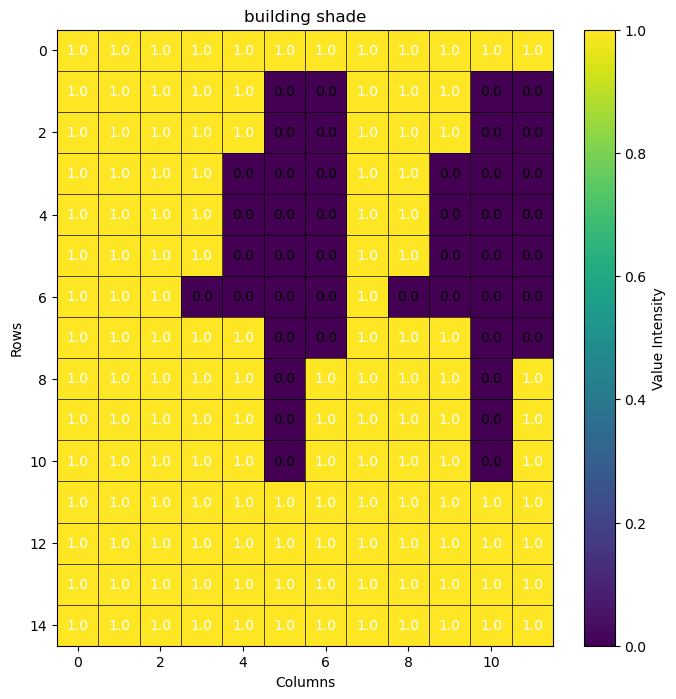

{'sh': array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 'vegsh': array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [38]:
azi = 200
alt = 45
scal = 1
shadowingfunction_3d(a, chm, chm, azi, alt, scal, 20, False, chm, True, "woo")

File written to 'D:/Geomatics/thesis/shadetest/endremoval/vgog_3.84 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/bdog_3.84 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/vbog_3.84 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/vgne_3.84 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/bdne_3.84 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/vbne_3.84 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/vgog_2.79 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/bdog_2.79 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/vbog_2.79 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/vgne_2.79 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/bdne_2.79 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/vbne_2.79 1.4.tif'
File written to 'D:/Geomatics/thesis/shadetest/endremoval/vgog_3.84 0.79.tif